# Exploratory Data Analysis

## Libraries to Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.preprocessing import image

## Define Image Directories

In [2]:
train_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/train'
val_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/validation'
test_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/test'

## EDA

### Sample Images

First, we need to create a list of all images for each class. Then select 3 images for a random sample to be displayed.

In [3]:
not_covid_imgs = [fn for fn in os.listdir(f'{train_dir}/not_covid') if fn.endswith('.png')]
covid_imgs = [fn for fn in os.listdir(f'{train_dir}/covid') if fn.endswith('.png')]

select_not_covid = np.random.choice(not_covid_imgs, 3, replace = False)
select_covid = np.random.choice(covid_imgs, 3, replace = False)

Plot random images from each class.

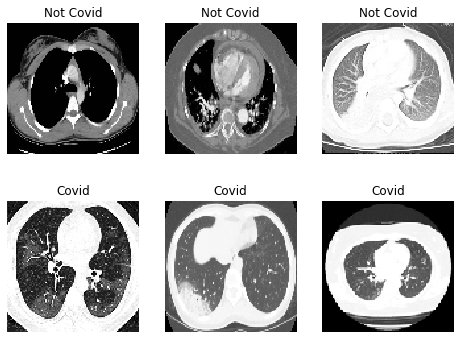

In [4]:
fig = plt.figure(figsize = (8,6))

for i in range(6):
    if i < 3:
        fp = f'{train_dir}/not_covid/{select_not_covid[i]}'
        label = 'Not Covid'
    else:
        fp = f'{train_dir}/covid/{select_covid[i-3]}'
        label = 'Covid'
    ax = fig.add_subplot(2, 3, i+1)
    fn = image.load_img(fp, target_size = (100,100),
                        color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

So we see in the Covid images hazy sections of the lungs and, as doctors describe it, a "ground glass" texture and white spots. 

### Class Imbalance

Visualize class imbalance by taking the length of the list containing each class' images.

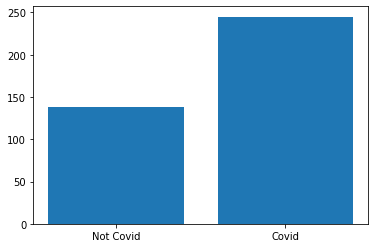

In [5]:
plt.bar(['Not Covid', 'Covid'], [len(not_covid_imgs), len(covid_imgs)], )
plt.show()

### Average Images

Define function to vectorize images for use in Numpy broadcasting operations. 

In [6]:
def img2np(pwd, fn_list, size = (64, 64)):
    for fn in fn_list:
        fp = pwd + fn
        current_image = image.load_img(fp, 
                                       target_size = size, 
                                       color_mode = 'grayscale')
        img_ts = image.img_to_array(current_image)
        img_ts = [img_ts.ravel()]
        try:
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            full_mat = img_ts
    return full_mat

Vectorize images.

In [7]:
not_covid_images = img2np(f'{train_dir}/not_covid/', not_covid_imgs)
covid_images = img2np(f'{train_dir}/covid/', covid_imgs)

Define function to plot average image from vectorized images using np.mean().

In [8]:
def find_mean_img(image_vecs, title, size = (64, 64)):
    mean_img = np.mean(image_vecs, axis = 0)
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

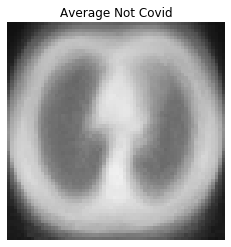

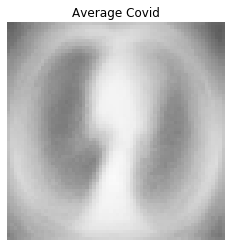

In [9]:
not_covid_mean = find_mean_img(not_covid_images, 'Not Covid')
covid_mean = find_mean_img(covid_images, 'Covid')

Here we really see the hazy nature of Covid in terms of patient's lungs. This is because over the many covid class images, spots of haziness in each image will aggregate and make the overall image hazy, too. In the not covid class, there are fewer white spots so less haze is aggregated to the overall image. 

### Standard Deviation Images

Define function to find the stdev of each class using np.std(). 

In [10]:
def find_std_img(image_vecs, title, size = (64, 64)):
    std_img = np.std(image_vecs, axis = 0)
    std_img = std_img.reshape(size)
    std_img = np.expand_dims(std_img, axis = 0)
    plt.imshow(std_img[0], cmap='Greys_r')
    plt.title(f'Standard Deviation {title}')
    plt.axis('off')
    plt.show()
    return std_img

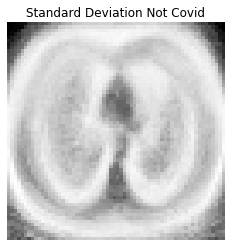

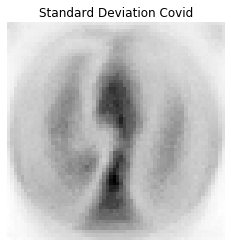

In [11]:
not_covid_std = find_std_img(not_covid_images, 'Not Covid')
covid_std = find_std_img(covid_images, 'Covid')

So this visualization shows regions of the chest cavity where there is more variability within the classes. Darker regions have less variability, for example, the spine is always in the same area so that region is darker. There is too much variability in both classes for this to be very useful. 